In [440]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [441]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM


In [442]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [443]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [444]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect="True")

In [445]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [446]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station


In [447]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [448]:
# Check Measurement data for reference

inspector = inspect(engine)
columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])


id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


# Exploratory Precipitation Analysis

In [449]:
# Find the most recent date in the data set.

session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23',)

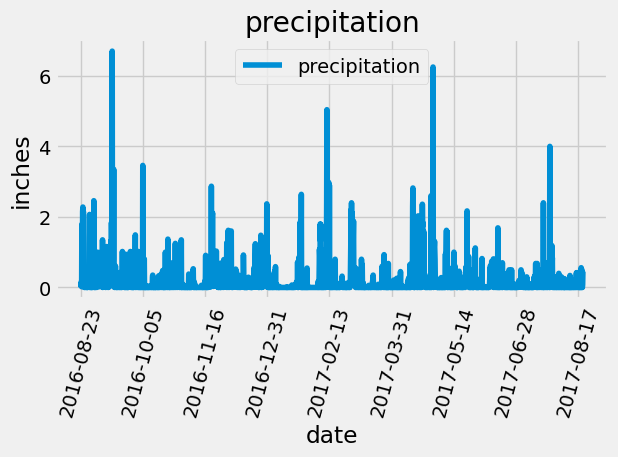

In [450]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
most_recent = dt.datetime(2017, 8, 23);

# Calculate the date one year from the last date in data set.
prior_year = most_recent - dt.timedelta(days=366);

# Perform a query to retrieve the date and precipitation scores
year_prcp = session.query(Measurement.date, Measurement.prcp).\
    filter(func.strftime(Measurement.date >= prior_year)).\
    order_by(Measurement.date).all()


# Save the query results as a Pandas DataFrame. Explicitly set the column names
columns = ['date','precipitation']
precipitation_df = pd.DataFrame.from_records(year_prcp,columns=columns,index='date').dropna(axis=0,how='any')


# Sort the dataframe by date
precipitation_df.sort_values(by=['date'])

#Use Pandas Plotting with Matplotlib to plot the data
precipitation_df.plot()
plt.title("precipitation")
plt.xlabel("date")
plt.ylabel("inches")
plt.xticks(rotation=75)
plt.tight_layout()
plt.show()


In [451]:
# Use Pandas to calculate the summary statistics for the precipitation data
precipitation_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [452]:
# Check Station data for reference
    
inspector = inspect(engine)
columns = inspector.get_columns('station')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [453]:
# Design a query to calculate the total number of stations in the dataset
total_stations = session.query(Station.name).distinct().count()
total_stations

9

In [454]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.

counts = [Measurement.station,
         func.count(Measurement.station)]

active_stations = session.query(*counts).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()
active_stations


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [466]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active = session.query(*counts).\
    order_by(func.count(Measurement.station).desc()).\
    group_by(Measurement.station).first()[0]
print(most_active)

# most_active = "USC00519281"
most_active_info = session.query(func.min(Measurement.tobs).filter(Measurement.station == most_active),\
                                 func.max(Measurement.tobs).filter(Measurement.station == most_active),\
                                 func.avg(Measurement.tobs).filter(Measurement.station == most_active)).all()
print(most_active_info)


USC00519281
[(54.0, 85.0, 71.66378066378067)]


In [479]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station

busybusy = session.query(Measurement.tobs).\
    filter(Measurement.station == 'USC00519281').\
    filter(Measurement.date >= prior_year).all()
busybusy

[(77.0,),
 (77.0,),
 (80.0,),
 (80.0,),
 (75.0,),
 (73.0,),
 (78.0,),
 (77.0,),
 (78.0,),
 (80.0,),
 (80.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (73.0,),
 (74.0,),
 (80.0,),
 (79.0,),
 (77.0,),
 (80.0,),
 (76.0,),
 (79.0,),
 (75.0,),
 (79.0,),
 (78.0,),
 (79.0,),
 (78.0,),
 (78.0,),
 (76.0,),
 (74.0,),
 (77.0,),
 (78.0,),
 (79.0,),
 (79.0,),
 (77.0,),
 (80.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (77.0,),
 (79.0,),
 (79.0,),
 (79.0,),
 (79.0,),
 (75.0,),
 (76.0,),
 (73.0,),
 (72.0,),
 (71.0,),
 (77.0,),
 (79.0,),
 (78.0,),
 (79.0,),
 (77.0,),
 (79.0,),
 (77.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (77.0,),
 (74.0,),
 (75.0,),
 (76.0,),
 (73.0,),
 (76.0,),
 (74.0,),
 (77.0,),
 (76.0,),
 (76.0,),
 (74.0,),
 (75.0,),
 (75.0,),
 (75.0,),
 (75.0,),
 (71.0,),
 (63.0,),
 (70.0,),
 (68.0,),
 (67.0,),
 (77.0,),
 (74.0,),
 (77.0,),
 (76.0,),
 (76.0,),
 (75.0,),
 (76.0,),
 (75.0,),
 (73.0,),
 (75.0,),
 (73.0,),
 (75.0,),
 (74.0,),
 (75.0,),
 (74.0,),
 (75.0,),
 (73.0,),
 (75.0,),
 (73.0,),
 (73.0,),


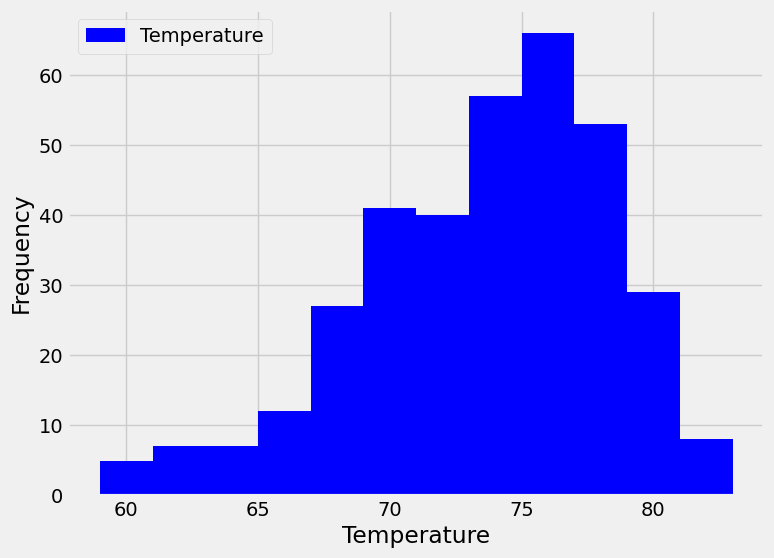

In [481]:
# Plot the results as a histogram
df_columns = ['Temperature']
busybusy_df = pd.DataFrame.from_records(busybusy,columns=df_columns)
busybusy_df

# plt.plot.hist(busybusy_df['Temperature'],busybusy_df['Frequency'])
busybusy_df.plot.hist(figsize = (8,6), color = "blue", bins=12,legend=True)
plt.xlabel("Temperature")
plt.ylabel("Frequency")

plt.show()

# Close Session

In [ ]:
# Close Session
session.close()